# Importing libraries

In [78]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from statistics import mean
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification

# CLassification of Pumpkin Seeds

In [2]:
# File loading 
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

# Getting the idea of the dataset
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


Information about the dataset : Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality types of pumpkin seeds, ‘‘Urgup_Sivrisi’’ and ‘‘Cercevelik’’, generally grown in Urgup and Karacaoren regions in Turkey. 
Source : https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset

In [3]:
# checking the shape of the dataset
df.shape

(2500, 13)

The dataset has 2500 rows and 13 columns, 12 features and 1 label column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


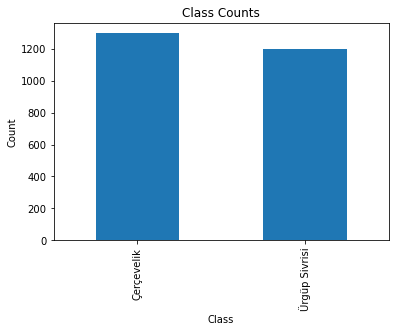

In [5]:
#checking balanced or unbalanced
class_counts = df['Class'].value_counts()

# create a bar chart of the class counts
class_counts.plot(kind='bar')

# set the chart title and axis labels
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')

# display the chart
plt.show()

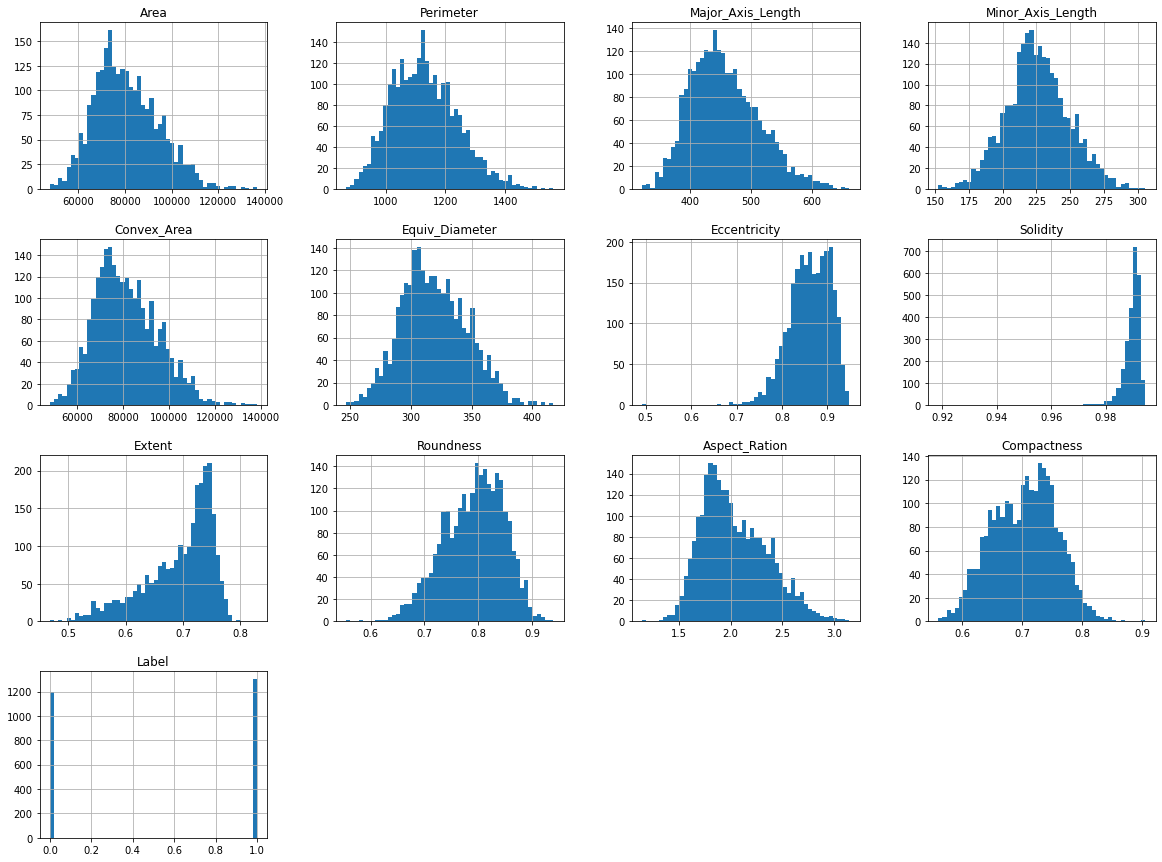

In [91]:
df.hist(bins=50, figsize=(20,15))
plt.show()

The dataset seems to be fairly balanced

<Figure size 1080x1440 with 0 Axes>

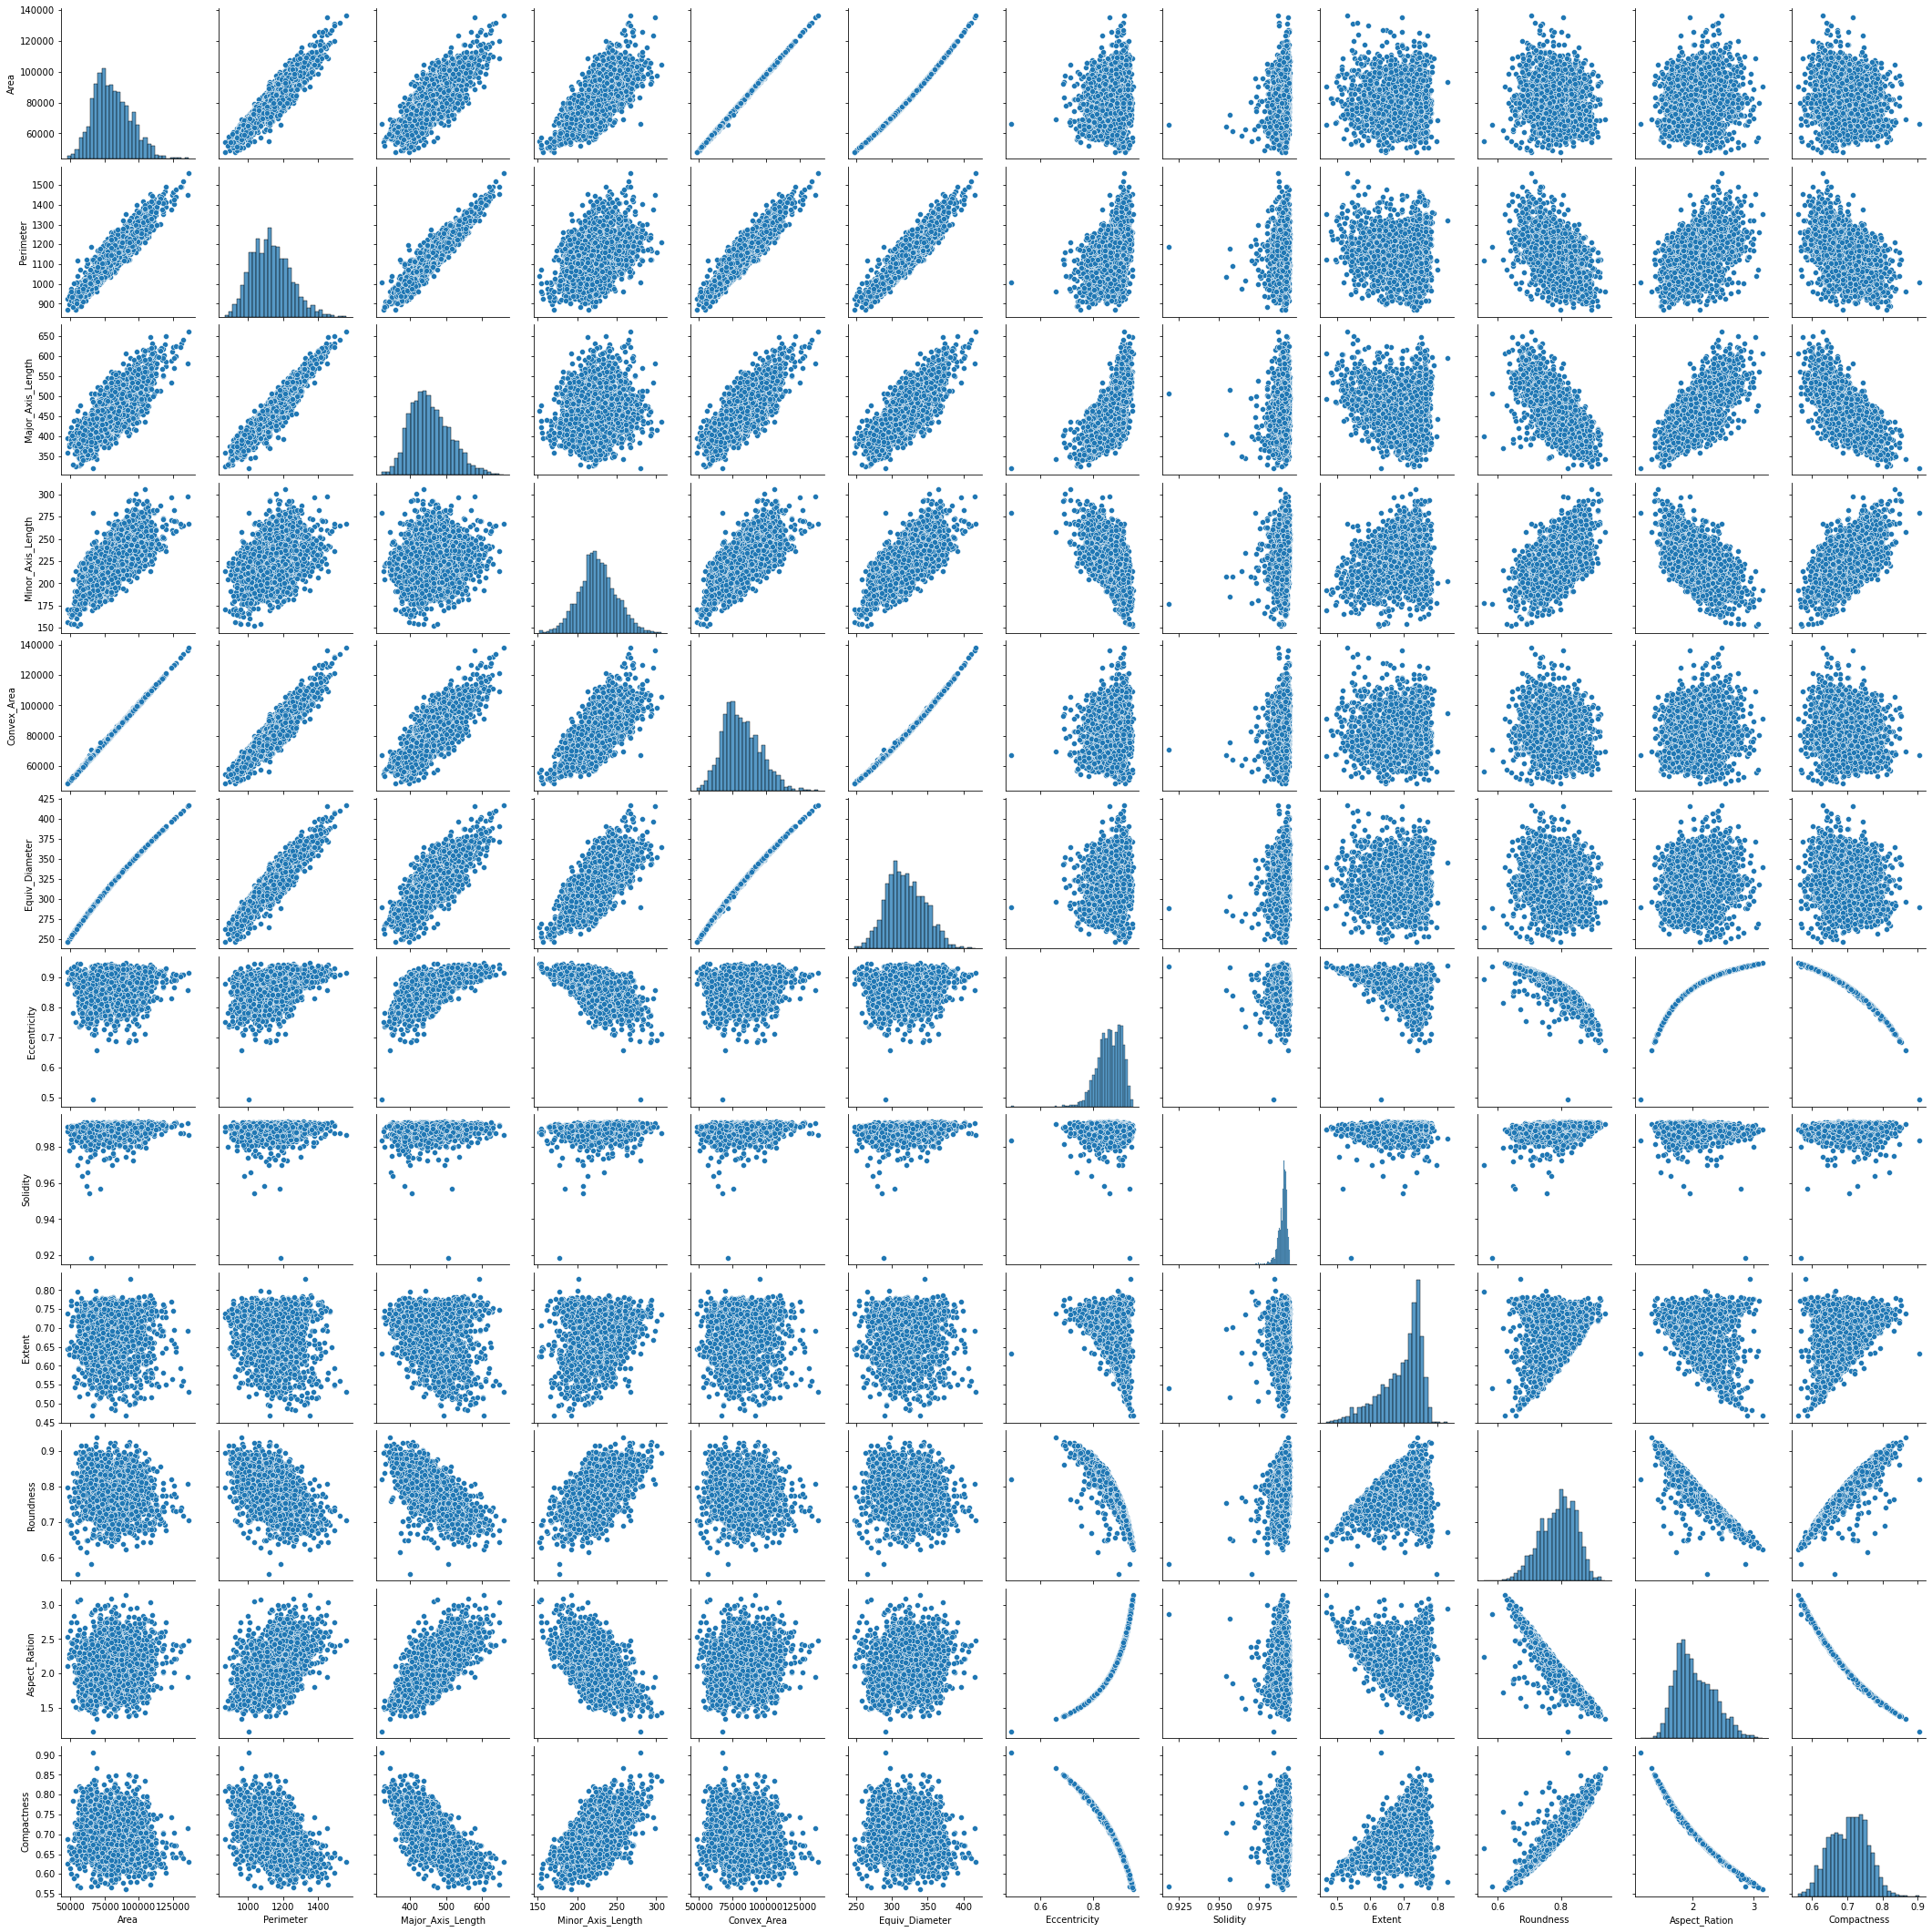

In [7]:
plt.figure(figsize=(15,20))
sns.pairplot(data=df)
plt.show()

In [8]:
#Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


we see no null values above

In [9]:



df['Label'] = pd.get_dummies(df['Class'])['Çerçevelik']




In [10]:
df.info

<bound method DataFrame.info of        Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidit

In [11]:
df1 = df.drop("Class", axis = 1)

In [12]:
df1.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Label
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1


In [13]:
#df1 = df1.drop("category_binary", axis = 1)

In [14]:
# Splitted Data
y_all = df1.pop('Label').to_numpy()
X_all = df1.to_numpy()


In [15]:
print(X_all.shape)
print(y_all.shape)

(2500, 12)
(2500,)


In [92]:


# Split the data into training and testing sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Check the size of the training and testing sets
print("Size of X_train: ", X_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of X_train:  (1750, 12)
Size of X_test:  (750, 12)
Size of y_train:  (1750,)
Size of y_test:  (750,)


In [17]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [93]:
X_test_scaled =  scaler.fit_transform(X_test)

In [94]:
X_train_scaled.shape

(1750, 12)

# Models

In [19]:
# function to evaluate the model using some set parameters using kgolf cross validation
def evaluate_model(X_train, y_train, model):
    X_neww = X_train
    y_neww = y_train

    # Create a StratifiedKFold object
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

    # Initialize lists to store training and validation accuracies
    train_acc = []
    val_acc = []

    # Loop over the folds
    fold_count = 1
    for train, validation in kfold.split(X_neww, y_neww):
        print(f"Fold {fold_count}")
        fold_count = fold_count + 1

        

        # Split the data into training and validation sets
        X_train, y_train = X_neww[train], y_neww[train]
        X_val, y_val = X_neww[validation], y_neww[validation]

        # Train the model on the training set
        history = model.fit(X_train, y_train)

        # Evaluate the model on the training set
        train_scores = model.score(X_train, y_train)
        train_acc.append(train_scores)

        # Evaluate the model on the validation set
        val_scores = model.score(X_val, y_val)
        val_acc.append(val_scores)
        
        y_pred = model.predict(X_val)
        report = classification_report(y_val, y_pred)
        print(report)

    # Plot the training and validation accuracies
    print("train_acc:", train_acc)
    print("val_ acc:", val_acc)
    mean_train_acc = mean(train_acc)
    mean_val_acc = mean(val_acc)
    train_acc_percent = round(mean_train_acc * 100, 2)
    val_acc_percent = round(mean_val_acc * 100, 2)
    print("Mean train_acc: {:.2f}%".format(train_acc_percent))
    print("Mean val_acc: {:.2f}%".format(val_acc_percent))
   


    plt.plot(train_acc, label='Training accuracy')
    plt.plot(val_acc, label='Validation accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [82]:

def ROC_curve(X_train_scaled, y_train, model):

    # Split the data into training and testing sets
    X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)


    model.fit(X_trainb, y_trainb)

    # Make predictions on the testing data
    y_pred_prob = model.predict_proba(X_testb)[:, 1]




    fpr, tpr, thresholds = roc_curve(y_testb, y_pred_prob)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_testb, y_pred_prob)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Multinomial regression

Running the model with popular hyperparameters at first to develop an understanding of how the model is in general is running over the dataset using kfold cross validatoin techniques.

Fold 1
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       210
           1       0.88      0.93      0.91       228

    accuracy                           0.90       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.90      0.90      0.90       438

Fold 2
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       210
           1       0.89      0.91      0.90       228

    accuracy                           0.89       438
   macro avg       0.90      0.89      0.89       438
weighted avg       0.90      0.89      0.89       438

Fold 3
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       210
           1       0.84      0.91      0.87       227

    accuracy                           0.86       437
   macro avg       0.87      0.86      0.86       437
weighted avg       0.87      0.86      0.86       437

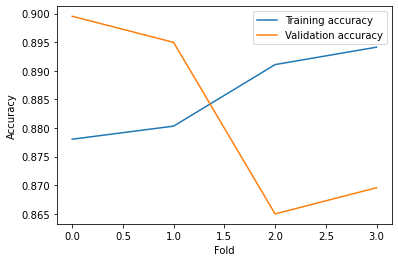

In [20]:
evaluate_model(X_train_scaled, y_train, model = LogisticRegression(multi_class='multinomial', solver='lbfgs'))

Fold 1
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       210
           1       0.88      0.93      0.91       228

    accuracy                           0.90       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.90      0.90      0.90       438

Fold 2
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       210
           1       0.89      0.91      0.90       228

    accuracy                           0.89       438
   macro avg       0.90      0.89      0.89       438
weighted avg       0.90      0.89      0.89       438

Fold 3
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       210
           1       0.84      0.91      0.87       227

    accuracy                           0.86       437
   macro avg       0.87      0.86      0.86       437
weighted avg       0.87      0.86      0.86       437

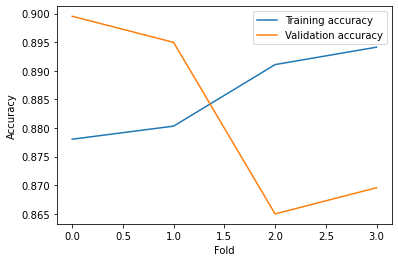

In [22]:
evaluate_model(X_train_scaled, y_train, model = LogisticRegression(multi_class='multinomial', solver='lbfgs'))

The modelperformed well as the validation accuracy is incrasing towards the end with mean training accuracy and mean validation accuracy over the four foulds does not vary. Hence the model is alos not overfitted.


## Now going ahead with selecting the best hyperparameters combination for the model by using gridsearch and informed search methods

Here the parameters which are varied are the C value, penalty term and number of iterations

In [58]:


# define the logistic regression classifier
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# define the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

# define the grid search
grid_search = GridSearchCV(
    logistic_regression, param_grid=param_grid,
    cv=None, n_jobs=-1, verbose=1
)

# fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# print the best hyperparameters and validation accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\nakul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nakul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nakul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nakul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Best hyperparameters:  {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Best validation accuracy:  0.8845714285714286


C:\Users\nakul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The best model that came out was with the following parameters: LogisticRegression(multi_class='multinomial', solver='lbfgs', C = 10, max_iter = 100, penalty = 'l2')

In [62]:
def run_the_best_model(X_train, y_train, model):

    X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
#    best_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', C = 10, max_iter = 100, penalty = 'l2')
    model.fit(X_trainn, y_trainn)
    y_pred = model.predict(X_val)
    
    
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True)
    report = classification_report(y_val, y_pred)
    print(report)

    val_scores = model.score(X_val, y_val)
    print(val_scores)
    
    return val_scores




              precision    recall  f1-score   support

           0       0.90      0.87      0.88       248
           1       0.89      0.92      0.90       277

    accuracy                           0.89       525
   macro avg       0.89      0.89      0.89       525
weighted avg       0.89      0.89      0.89       525

0.8933333333333333


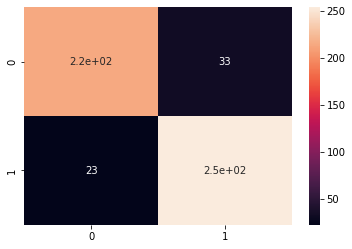

In [68]:
multi_acc = run_the_best_model(X_train_scaled, y_train, model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C =10 , max_iter = 300, penalty = 'l2'))

The accuracy looks to have improved slightly and we have a better precision than most of them combined

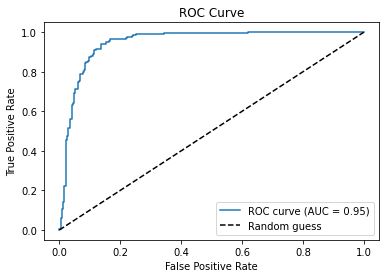

In [85]:
ROC_curve(X_train_scaled, y_train, model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C =10 , max_iter = 300, penalty = 'l2'))

# SVM

## With linear kernel

So here I have first individually seen the results for svm classifier using the 4 different kernels :

- Lineaer
- RBF
- Polynomial
- Sigmoid

accordingly with the corss fold validation accuracy wise the best model wsa one with 86% accuracy which had rfb kernel.
The highest "precision" for class "0" is however attained by the "polynomial" kernel with 97%. This model can be used in cases where in the restraunts or production factories the precision of identifying the correct seed is more important than recall. However it comes with a trade off of loosing some percentages in the recall for class "0".



Fold 1
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       210
           1       0.87      0.94      0.90       228

    accuracy                           0.90       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.90      0.90      0.90       438

Fold 2
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       210
           1       0.88      0.93      0.90       228

    accuracy                           0.90       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.90      0.90      0.90       438

Fold 3
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       210
           1       0.84      0.91      0.88       227

    accuracy                           0.86       437
   macro avg       0.87      0.86      0.86       437
weighted avg       0.87      0.86      0.86       437

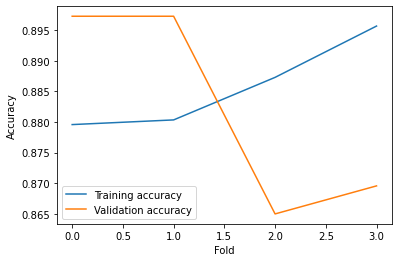

In [23]:
#linear kernel
evaluate_model(X_train_scaled, y_train, model = SVC(kernel='linear', C=1))

Fold 1
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       210
           1       0.89      0.92      0.90       228

    accuracy                           0.90       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.90      0.90      0.90       438

Fold 2
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       210
           1       0.87      0.93      0.90       228

    accuracy                           0.89       438
   macro avg       0.90      0.89      0.89       438
weighted avg       0.89      0.89      0.89       438

Fold 3
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       210
           1       0.84      0.92      0.88       227

    accuracy                           0.87       437
   macro avg       0.87      0.87      0.87       437
weighted avg       0.87      0.87      0.87       437

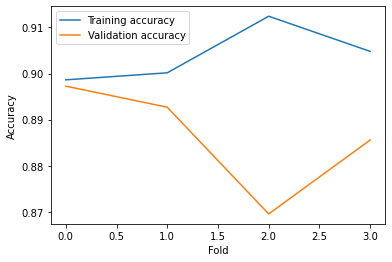

In [25]:
# svm with rbf kernel
evaluate_model(X_train_scaled, y_train, model = SVC(gamma = 'scale', kernel='rbf', C=5))

Fold 1
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       210
           1       0.82      0.98      0.89       228

    accuracy                           0.88       438
   macro avg       0.90      0.87      0.88       438
weighted avg       0.89      0.88      0.88       438

Fold 2
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       210
           1       0.79      0.96      0.87       228

    accuracy                           0.85       438
   macro avg       0.87      0.84      0.84       438
weighted avg       0.86      0.85      0.84       438

Fold 3
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       210
           1       0.79      0.96      0.87       227

    accuracy                           0.84       437
   macro avg       0.87      0.84      0.84       437
weighted avg       0.86      0.84      0.84       437

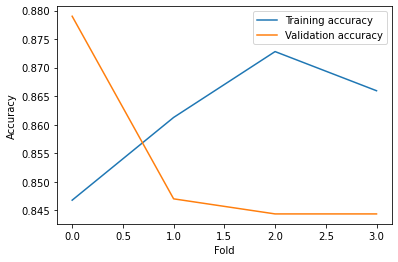

In [27]:
# svm with polynomial kernel
evaluate_model(X_train_scaled, y_train, model = SVC(kernel='poly', degree=3))

Fold 1
              precision    recall  f1-score   support

           0       0.83      0.74      0.79       210
           1       0.78      0.86      0.82       228

    accuracy                           0.81       438
   macro avg       0.81      0.80      0.80       438
weighted avg       0.81      0.81      0.80       438

Fold 2
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       210
           1       0.82      0.80      0.81       228

    accuracy                           0.80       438
   macro avg       0.80      0.80      0.80       438
weighted avg       0.80      0.80      0.80       438

Fold 3
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       210
           1       0.81      0.80      0.80       227

    accuracy                           0.80       437
   macro avg       0.80      0.80      0.80       437
weighted avg       0.80      0.80      0.80       437

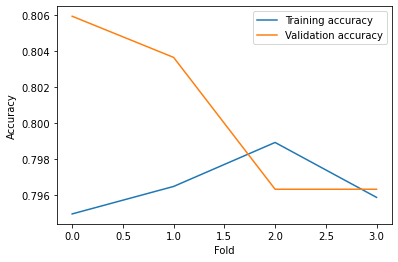

In [28]:
#svm with sigmoid kernel

evaluate_model(X_train_scaled, y_train, model = SVC(kernel='sigmoid'))

Now that I know some preliminary knowledge of how svm with different kernels perform on the training and validation set I will move forward to perfom gridsearch to understand the best parameters for the model.

In the above cases the best model was with the "rbf" kernel with mean validation accuracy of 88.6% and precison of 91 %.

In [69]:
#performing gridsearch

svc = SVC()

# define the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3],
    'gamma' :['scale', 'auto', 0.1, 1, 10]
}


# define the grid search
grid_search = GridSearchCV(
    svc, param_grid=param_grid,
    cv=None, n_jobs=-1, verbose=1
)

# fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# print the best hyperparameters and validation accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparameters:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation accuracy:  0.8897142857142857


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       248
           1       0.89      0.93      0.91       277

    accuracy                           0.90       525
   macro avg       0.90      0.90      0.90       525
weighted avg       0.90      0.90      0.90       525

0.900952380952381


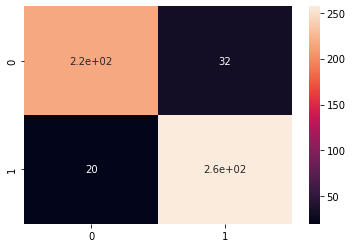

In [67]:
svm_acc = run_the_best_model(X_train_scaled, y_train, model = SVC(C= 10, degree= 2, gamma= 'scale', kernel ='rbf'))

By running the above model with best parameters found out from grid searh it is evident that the it outperforms the one in the which performed best earlier with "rbf" kernel in both accuracy and precision

- Earlier model with rbf accuracy : 88.63 %
- Model with best parameters accuracy :90.01 %

- Earlier model with rbf precision for class 0 :  61 %
- Model with best parameters precision for class 0 : 92%:


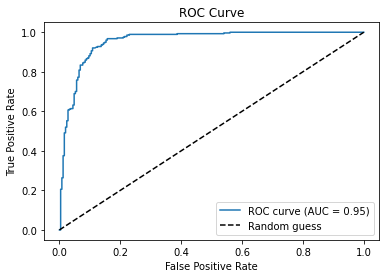

In [84]:
ROC_curve(X_train_scaled, y_train, model = SVC(C= 10, degree= 2, gamma= 'scale', kernel ='rbf', probability = True))

# Random forest

Fitting a random forest model with n_estimators = 100 to have an idea how the model fits and develop a baseline for the model improvement with gridsearch and hyperparameter tuning.

Fold 1
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       210
           1       0.89      0.93      0.91       228

    accuracy                           0.91       438
   macro avg       0.91      0.91      0.91       438
weighted avg       0.91      0.91      0.91       438

Fold 2
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       210
           1       0.89      0.92      0.90       228

    accuracy                           0.90       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.90      0.90      0.90       438

Fold 3
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       210
           1       0.87      0.89      0.88       227

    accuracy                           0.87       437
   macro avg       0.87      0.87      0.87       437
weighted avg       0.87      0.87      0.87       437

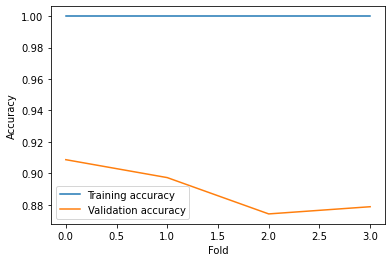

In [35]:
evaluate_model(X_train_scaled, y_train, model = RandomForestClassifier(n_estimators=100, random_state=42))

The above model does not seem to be overfitted. One of the reasons I can think the accuracies are comparitavely low or not greater than 90 % is that the dataset is really small with 1750 points in the training set only which gets further divided into a validation set and training set.

In the code below I have tried to do hyper parameter tuning using one parameter the estimators

In [55]:
def variation_wtih_esti(X_trainn, y_trainn, model):

    estimators = [50,100,150,200,250,300,350,400,450,500,550,650]
    MCV_list = []

   
    for e in estimators:
        # Initialize RBF Kernel SVM classifier
        current_rf =  RandomForestClassifier(n_estimators= e, max_depth=5, random_state=42)
        #current_svm = model
        kf = KFold(n_splits=3, random_state=1, shuffle=True)
        # Cross validation 3-Fold scores        
        mean_crossval = np.mean(cross_val_score(current_rf, X_trainn, y_trainn, cv=kf))
        MCV_list.append(mean_crossval)
        #print("On C=", C, "\tMCV=", mean_crossval)
        
        
    plt.plot(estimators, MCV_list, color= 'teal')
    plt.title("Mean Cross Validation accuracy across estimators" ,fontsize=15, fontweight="bold")
    plt.xlabel('Estimator value', fontsize = 15)
    plt.xscale("log")
    plt.ylabel('Mean Cross Validation', fontsize = 15)
    plt.show()

    print("Highest val_accuracy : ", max(MCV_list))
    print("The optimum estimator_value being: ",estimators[MCV_list.index(max(MCV_list))] )

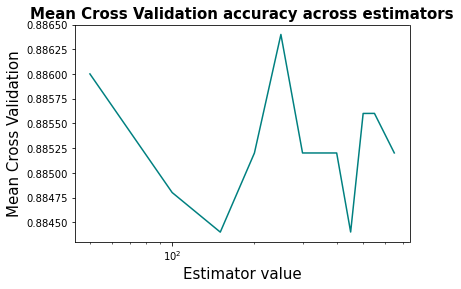

Highest val_accuracy :  0.8864015630232909
The optimum estimator_value being:  250


In [56]:
variation_wtih_esti(scaled_X_full, y_all, model = "rf")

In the code below I have search for the best values of gamma and estimators and tried to visulaize it in 3D mesh. The best combination can be one with many parameters so  I decided to go ahead with the best parameters fround out by gridsearch in the code after this one which yields more accuracy than this.

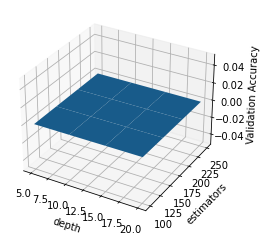

Best combination of depth and esti: (5, 100)


In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the iris dataset

X = scaled_X_full
y = y_all

# Define a range of gamma and C values
depth_range = [i for i in range(5, 21, 5)]
esti_range = [100,150,200,250]

# Create a grid of gamma and C values
depth_grid, esti_grid = np.meshgrid(depth_range, esti_range)

# Calculate the validation accuracy for each combination of gamma and C
scores = np.zeros_like(depth_grid)
for i in range(len(depth_range)):
    for j in range(len(esti_range)):
        clf = RandomForestClassifier(n_estimators= esti_range[j], max_depth=depth_range[i], random_state=42)
        scores[j, i] = np.mean(cross_val_score(clf, X, y, cv=4))

# Create a 3D plot of the validation accuracy surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(depth_grid, esti_grid, scores)
ax.set_xlabel('depth')
ax.set_ylabel('estimators')
ax.set_zlabel('Validation Accuracy')
plt.show()

# Get the combination of gamma and C values for which the validation accuracy was the highest
max_indices = np.unravel_index(np.argmax(scores), scores.shape)
best_depth = depth_range[max_indices[1]]
best_esti = esti_range[max_indices[0]]
print("Best combination of depth and esti:", (best_depth, best_esti))


In the code below I have performed grid search with 4 fold cross validation for the validation accuracy and then have retruned the model parameters pertaining to the best mean validation accuracy.

In [60]:

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters to search
param_grid = {'n_estimators': [10, 50, 100,150,200,250,300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['sqrt', 'log2']}

# Perform grid search with 4-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=4)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best validation accuracy: 0.8904000000000001



In the code below I have performed grid search with different vales of hyper parameters and have not performed k-fold corss validation. Since I have received an accuracy better than the pervioud grid serarch run, I would be choosing these parameters as the best one for random forest classifier as clearly the accuracy of this model : "89.54%" is greater than the eariler two models: "89%" for earlier grid search , and "88.97 %" for the basic run

In [64]:

# define the random forest classifier
rfc = RandomForestClassifier()

# define the hyperparameter search space
param_grid = {
    'n_estimators': [10, 50, 100,150,200,250],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# define the grid search
grid_search = GridSearchCV(
    rfc, param_grid=param_grid,
    cv=None, n_jobs=-1, verbose=1
)

# fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# print the best hyperparameters and validation accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters:  {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best validation accuracy:  0.8954285714285716


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       248
           1       0.90      0.90      0.90       277

    accuracy                           0.90       525
   macro avg       0.89      0.89      0.89       525
weighted avg       0.90      0.90      0.90       525

0.8952380952380953


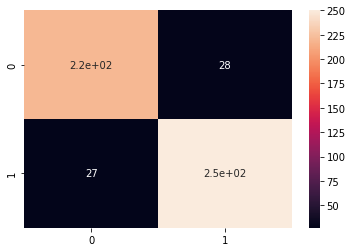

In [71]:
rf_acc = run_the_best_model(X_train_scaled, y_train, model = RandomForestClassifier(max_depth = 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200))

As expected this model gave the best accuracy precision for class 1 scores. The above model can be used for the testing dataset or in the ensemble as it is generalized well.

- Earlier base model with 100 base estimators accuracy : 88.97 %
- Earlier model with hyperparameter tunining with kfold validation accuracy : 89.04 %
- Model above with best parameters accuracy :89.5 %

- Earlier model with 100 base estimators precision for class 1 :  88 %
- Model with best parameters precision for class 1 : 90%:

Hence we can see substantial improvement in the model with these parameters

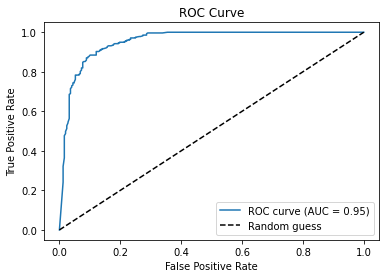

In [81]:
ROC_curve(X_train_scaled, y_train, model = RandomForestClassifier(max_depth = 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200))

###### Feature importance

In [37]:
clf =  RandomForestClassifier(max_depth = 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
clf.fit(X_train_scaled, y_train)
importances = clf.feature_importances_

In [39]:
feature_names = df1.columns.tolist()

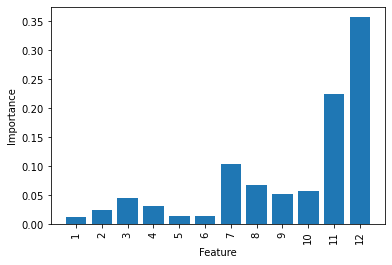

In [38]:
plt.bar(range(X_train_scaled.shape[1]), importances)
plt.xticks(range(X_train_scaled.shape[1]), range(1, X_train_scaled.shape[1]+1), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [43]:
important_features =  [12, 11, 7]
print("The following are the important most features: ")
for i in important_features:
    print(feature_names[i-1])

The following are the important most features: 
Compactness
Aspect_Ration
Eccentricity


The above information is necessary as with the help of best parameteres random forest we got to know the rankings of how good a feature is. The top 3 I have printed above which tell us that while collecting the dataset and measuring the features of the seed utmost care and precsion should be maintained for the measurement of "Compactness" , "Aspect_Ratio" and "Eccentricity" of the seed. 

This directly helps in understanding better what is important when improving the overall pipeline of model building right from data collection

# Ensemble of best models

In [50]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy as np

# Define individual classifiers
clf1 = RandomForestClassifier(max_depth = None, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200)
clf2 = LogisticRegression(C =3.90, max_iter =500, penalty = 'l2', solver= 'lbfgs')
clf3 = SVC(gamma = 'scale', kernel='rbf', C=5)

# Create the voting classifier
ensemble_clf = VotingClassifier(
    estimators=[('dt', clf1), ('lr', clf2), ('svm', clf3)],
    voting='hard'
)

# Load data and target variables
X_new = X_train_scaled  # input features
y_new = y_train  # target variable

# Set up k-fold cross-validation
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
    
# Loop over the k folds
best_acc = 0
for train_idx, test_idx in kfold.split(X_new):
    # Split data into training and test sets
    X_train, y_train = X_new[train_idx], y_new[train_idx]
    X_test, y_test = X_new[test_idx], y_new[test_idx]

    # Train the ensemble classifier
    ensemble_clf.fit(X_train, y_train)

    # Test the ensemble classifier
    acc = ensemble_clf.score(X_test, y_test)
    if acc > best_acc:
        best_acc = acc
        


# Print the best validation accuracy
print(f"Best validation accuracy: {best_acc}")

Best validation accuracy: 0.9041095890410958


In [ ]:
'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200
                    'C': 10, 'max_iter': 100, 'penalty': 'l2'

In [57]:


# Define individual classifiers

def ensemble_accuracy(X_train_scaled, y_train):
    clf1 = RandomForestClassifier(max_depth = 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
    clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', C =10 , max_iter = 300, penalty = 'l2')
    clf3 = SVC(C= 10, degree= 2, gamma= 'scale', kernel ='rbf')

    # Create the voting classifier
    ensemble_clf = VotingClassifier(
        estimators=[('dt', clf1), ('lr', clf2), ('svm', clf3)],
        voting='hard'
    )

    # Load data and target variables
    X_new = X_train_scaled  # input features
    y_new = y_train  # target variable





    #aplitting the into training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

    ensemble_clf.fit(X_train, y_train)

     # Test the ensemble classifier
    acc = ensemble_clf.score(X_val, y_val)

    
    print(f"Best validation accuracy: {acc}")

###### As it is seen here the ensemble ran using the best parameters out performs the accruacy score of inidvidual models shown above:

In [59]:
ensemble_accuracy(X_train_scaled, y_train)

Best validation accuracy: 0.9028571428571428


              precision    recall  f1-score   support

           0       0.91      0.88      0.90       248
           1       0.90      0.92      0.91       277

    accuracy                           0.90       525
   macro avg       0.91      0.90      0.90       525
weighted avg       0.90      0.90      0.90       525

0.9047619047619048


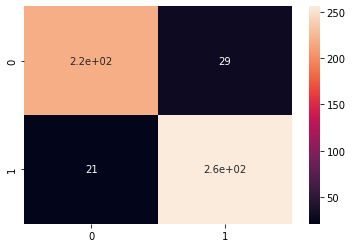

In [60]:
run_the_best_model(X_train_scaled, y_train, model = VotingClassifier(
        estimators=[('dt', clf1), ('lr', clf2), ('svm', clf3)],
        voting='hard'
    ))

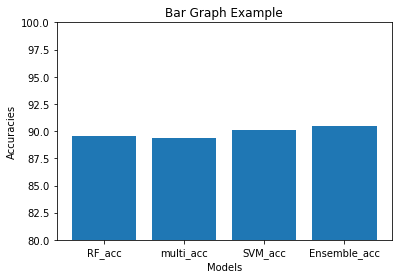

The accuracy of the ensemble data is the highest and outperforms the individual classifiers


In [86]:
values = [rf_acc*100, multi_acc*100, svm_acc*100, 90.47]
labels = ['RF_acc', 'multi_acc', 'SVM_acc', 'Ensemble_acc']

# Create a bar plot
plt.bar(labels, values)

# Set the title and axis labels
plt.title('Bar Graph Example')
plt.xlabel('Models')
plt.ylabel('Accuracies')


plt.ylim(80, 100)
# Show the plot
plt.show()
print("The accuracy of the ensemble data is the highest and outperforms the individual classifiers")

- There are some parameters like the precision for class 0  which are greater all the other classifiers taken individually other than svm which are greater with the ensemble.
- Similarly the recall for class 1 of ensemble is higher than all the other calssifiers put individually other than SVM. 
- Overall accuracy of this one is better.

In [ ]:
# do graph on testing dataset

In [99]:
def run_the_best_model_test(X_train, y_train,X_test, y_test ,model):


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    report = classification_report(y_test, y_pred)
    print(report)

    val_scores = model.score(X_test, y_test)
    print(val_scores)
    
    return val_scores

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.89      0.87      0.88       390

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750

0.8746666666666667


0.8746666666666667

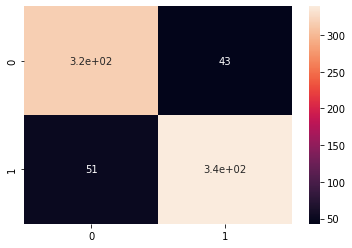

In [98]:
run_the_best_model_test(X_train_scaled, y_train,X_test_scaled, y_test ,model = RandomForestClassifier(max_depth = 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       360
           1       0.88      0.90      0.89       390

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750

0.8813333333333333


0.8813333333333333

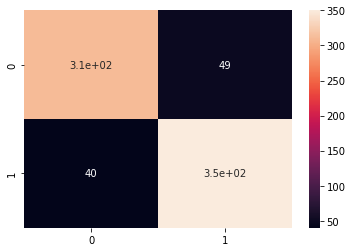

In [101]:
run_the_best_model_test(X_train_scaled, y_train,X_test_scaled, y_test ,model = VotingClassifier(
        estimators=[('dt', clf1), ('lr', clf2), ('svm', clf3)],
        voting='hard'
    ))

The ensemble outperforms individual random forest in terms of accuracy precision for class 0 and recall for class 1 while performing on the test dataset